In [79]:
import pandas as pd
import numpy as np
file = pd.read_csv("repeaters14-18.csv", header = None)
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
import pprint

In [80]:
officer_id = file[0].unique()
category = file[1].unique()

d = {}

for i in officer_id:
    d[i] = {}
    d[i]['total'] = 0.0
    for j in category:
        d[i][j] = 0.0
for index, row in file.iterrows():
    d[row[0]][row[1]] = row[2]
    d[row[0]]['total'] += row[2]
inputdata = pd.DataFrame.from_dict(d, orient = 'index')
inputdata

,total,Conduct Unbecoming (Off-Duty),False Arrest,Illegal Search,Lockup Procedures,Operation/Personnel Violations,Use Of Force,Verbal Abuse,Criminal Misconduct,Domestic,Traffic,Bribery / Official Corruption,Supervisory Responsibilities,Money / Property,Medical,Racial Profiling,Excessive Force,Drug / Alcohol Abuse,Unknown
60,25.0,1.0,2.0,10.0,2.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,11.0,0.0,3.0,2.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,31.0,0.0,0.0,1.0,1.0,13.0,9.0,3.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400,16.0,0.0,5.0,2.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32415,10.0,0.0,1.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32423,28.0,1.0,1.0,5.0,3.0,4.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32430,22.0,1.0,2.0,7.0,0.0,2.0,3.0,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [81]:
data = inputdata[['Illegal Search','Use Of Force', 'False Arrest', 'Operation/Personnel Violations']]
y = inputdata['total']

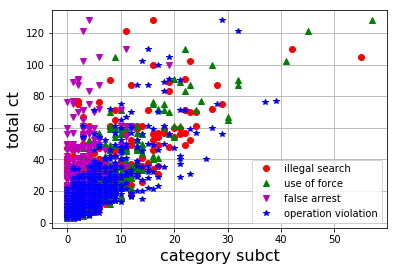

In [82]:
plt.figure(facecolor='w')
plt.plot(data['Illegal Search'], y, 'ro', label='illegal search')
plt.plot(data['Use Of Force'], y, 'g^', label='use of force')
plt.plot(data['False Arrest'], y, 'mv', label='false arrest')
plt.plot(data['Operation/Personnel Violations'], y, 'b*', label='operation violation')
plt.legend(loc='lower right')
plt.xlabel(u'category subct', fontsize=16)
plt.ylabel(u'total ct', fontsize=16)
plt.grid()
plt.show()

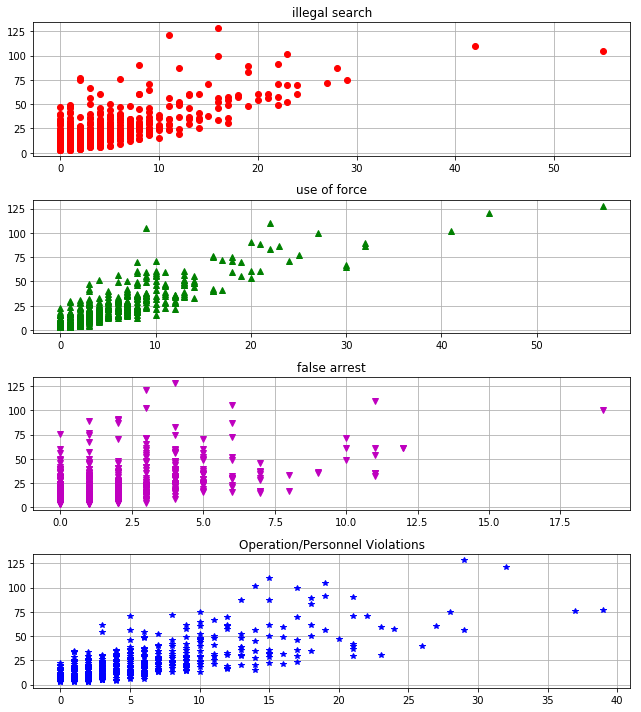

In [83]:
plt.figure(facecolor='w', figsize=(9, 10))
plt.subplot(411)
plt.plot(data['Illegal Search'], y, 'ro')
plt.title('illegal search')
plt.grid()
plt.subplot(412)
plt.plot(data['Use Of Force'], y, 'g^')
plt.title('use of force')
plt.grid()
plt.subplot(413)
plt.plot(data['False Arrest'], y, 'mv')
plt.title('false arrest')
plt.grid()
plt.subplot(414)
plt.plot(data['Operation/Personnel Violations'], y, 'b*')
plt.title('Operation/Personnel Violations')
plt.grid()
plt.tight_layout()
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
x_train, x_test, y_train, y_test = train_test_split(data, y, train_size=0.8, random_state=1)
linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order, :]
y_hat = linreg.predict(x_test)
mse = np.average((y_hat - np.array(y_test)) ** 2)  
rmse = np.sqrt(mse)  
print ('MSE = ', mse)
print ('RMSE = ', rmse)
print ('score for training set = ', linreg.score(x_train, y_train))
print ('score for testing set = ', linreg.score(x_test, y_test))
print ('intercept: ', linreg.intercept_)
print ('coef: ', linreg.coef_)
print('actual total cases: ', np.sum(y))
print('predicted total cases: ', np.sum(np.sum(linreg.coef_*data + linreg.intercept_)))
print(linreg.coef_*data)


MSE =  9.016339529764586
RMSE =  3.0027220200618947
score for training set =  0.970712010615564
score for testing set =  0.9531618531757248
intercept:  0.7490838986652193
coef:  [1.14035569 1.35575529 1.02469764 1.32925022]
actual total cases:  12707.0
predicted total cases:  13981.43614211605
       Illegal Search  Use Of Force  False Arrest  \
60          11.403557     10.846042      2.049395   
72           1.140356      1.355755      0.000000   
135          2.280711      4.067266      3.074093   
152          1.140356     12.201798      0.000000   
193          0.000000      1.355755      0.000000   
...               ...           ...           ...   
32400        2.280711      5.423021      5.123488   
32415        4.561423      1.355755      1.024698   
32423        5.701778     16.269063      1.024698   
32430        7.982490      4.067266      2.049395   
32435        7.982490      5.423021      2.049395   

       Operation/Personnel Violations  
60                          

/Users/stevenchen/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


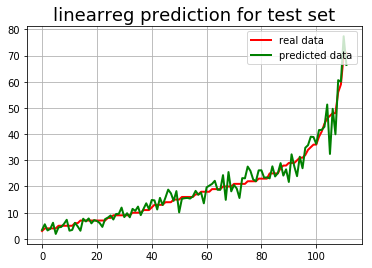

In [85]:
plt.figure(facecolor='w')
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label=u'real data')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'predicted data')
plt.legend(loc='upper right')
plt.title(u'linearreg prediction for test set', fontsize=18)
plt.grid(b=True)
plt.show()